In [1]:
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import sys
from os.path import dirname
sys.path.append(dirname("../../"))

from src.utilities import *
from src.reccomendation_util import *

In [3]:
%load_ext autoreload
%autoreload 2

### Get Metadata

In [4]:
recipe_metadata = pd.read_csv("../../data/recommendation/RAW_recipes.csv")
recipe_metadata.shape

(231637, 13)

### get embeddings from saved models

In [5]:
model1 = load_pickle("../../models/reccomender_model1_svd.pkl")
user_embeddings1,item_embeddings1 = get_embeddings(model1)
user_embeddings1.shape, item_embeddings1.shape

user shape:193016, item shape:209610


((193016, 5), (209610, 5))

In [6]:
user_embeddings1_df = embed_to_df(model1, user_embeddings1, "user")
item_embeddings1_df = embed_to_df(model1, item_embeddings1, "item")
user_embeddings1_df.shape, item_embeddings1_df.shape

((193016, 6), (209610, 6))

In [7]:
user_embeddings1_df.head()

,latent_1,latent_2,latent_3,latent_4,latent_5,user_id
0,-0.010296,0.111782,-0.134927,-0.299283,0.004161,353911
1,-0.033296,0.068205,0.050819,-0.049486,0.134362,635209
2,0.076973,0.009772,-0.014072,-0.067256,-0.074588,58332
3,0.144634,0.131153,-0.022586,-0.059460,0.089625,349752
4,-0.143835,0.154568,-0.054870,0.143120,-0.066081,1143059


In [8]:
item_embeddings1_df.head()

,latent_1,latent_2,latent_3,latent_4,latent_5,item_id
0,-0.141349,0.274049,-0.122359,-0.199768,0.082961,135272
1,-0.023485,0.056214,0.044654,0.044460,-0.029818,221183
2,-0.184961,0.041188,0.008938,-0.093345,0.138042,206491
3,-0.009411,0.249865,-0.245123,0.121521,-0.059910,217763
4,0.056974,-0.127314,-0.156622,0.088691,0.022816,43267


### Subset Item Embeddings for interaction filter

In [13]:
raw_subset= pd.read_csv("../../data/reccomendation_subset_data.csv")
raw_subset.shape

(872021, 5)

In [15]:
recipe_subset = set(raw_subset["recipe_id"])
item_embeddings2_df = item_embeddings1_df[item_embeddings1_df["item_id"].isin(recipe_subset)]
item_embeddings2_df.shape

(193901, 6)

### Create TSNE Embeddings

In [16]:
tsne = TSNE(n_components=2, n_iter=500, verbose=1, random_state=1)
tsne_item1 = tsne.fit_transform(item_embeddings1_df.drop(columns=["item_id"]))

/Users/ashish1610dhiman/opt/anaconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ashish1610dhiman/opt/anaconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 209610 samples in 0.175s...
[t-SNE] Computed neighbors for 209610 samples in 40.262s...
[t-SNE] Computed conditional probabilities for sample 1000 / 209610
[t-SNE] Computed conditional probabilities for sample 2000 / 209610
[t-SNE] Computed conditional probabilities for sample 3000 / 209610
[t-SNE] Computed conditional probabilities for sample 4000 / 209610
[t-SNE] Computed conditional probabilities for sample 5000 / 209610
[t-SNE] Computed conditional probabilities for sample 6000 / 209610
[t-SNE] Computed conditional probabilities for sample 7000 / 209610
[t-SNE] Computed conditional probabilities for sample 8000 / 209610
[t-SNE] Computed conditional probabilities for sample 9000 / 209610
[t-SNE] Computed conditional probabilities for sample 10000 / 209610
[t-SNE] Computed conditional probabilities for sample 11000 / 209610
[t-SNE] Computed conditional probabilities for sample 12000 / 209610
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 133000 / 209610
[t-SNE] Computed conditional probabilities for sample 134000 / 209610
[t-SNE] Computed conditional probabilities for sample 135000 / 209610
[t-SNE] Computed conditional probabilities for sample 136000 / 209610
[t-SNE] Computed conditional probabilities for sample 137000 / 209610
[t-SNE] Computed conditional probabilities for sample 138000 / 209610
[t-SNE] Computed conditional probabilities for sample 139000 / 209610
[t-SNE] Computed conditional probabilities for sample 140000 / 209610
[t-SNE] Computed conditional probabilities for sample 141000 / 209610
[t-SNE] Computed conditional probabilities for sample 142000 / 209610
[t-SNE] Computed conditional probabilities for sample 143000 / 209610
[t-SNE] Computed conditional probabilities for sample 144000 / 209610
[t-SNE] Computed conditional probabilities for sample 145000 / 209610
[t-SNE] Computed conditional probabilities for sample 146000 / 209610
[t-SNE] Computed con

In [17]:
tsne_projection = pd.DataFrame(columns=['x', 'y'], data=tsne_item1)
tsne_projection["item_id"] = item_embeddings1_df["item_id"]
tsne_projection.to_csv("../../data/recommendation/tsne_projection1.csv")

In [ ]:
# tsne_projection = pd.read_csv("../../data/recommendation/tsne_projection1.csv")

### Visualise 

In [18]:
merged = recipe_metadata.merge(tsne_projection, left_on=["id"], right_on = ["item_id"], how="inner")
recipe_metadata.shape,tsne_projection.shape, merged.shape

((231637, 13), (209610, 3), (209610, 16))

In [19]:
recipe_metadata.head()

,Unnamed: 0,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [20]:
import ast
merged["ingredients_list"] = merged["ingredients"].apply(lambda x: ast.literal_eval(x))
merged['nutrition_list'] = merged['nutrition'].apply(lambda x: ast.literal_eval(x))

In [21]:
merged[['calories','fat_dv',"sugar_dv",\
           "sodium_dv","protein_dv","sat_fat", "carbs_dv"]\
      ] = pd.DataFrame(merged.nutrition_list.tolist(), index= merged.index)

In [22]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209610 entries, 0 to 209609
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        209610 non-null  int64  
 1   name              209609 non-null  object 
 2   id                209610 non-null  int64  
 3   minutes           209610 non-null  int64  
 4   contributor_id    209610 non-null  int64  
 5   submitted         209610 non-null  object 
 6   tags              209610 non-null  object 
 7   nutrition         209610 non-null  object 
 8   n_steps           209610 non-null  int64  
 9   steps             209610 non-null  object 
 10  description       205091 non-null  object 
 11  ingredients       209610 non-null  object 
 12  n_ingredients     209610 non-null  int64  
 13  x                 209610 non-null  float32
 14  y                 209610 non-null  float32
 15  item_id           209610 non-null  int64  
 16  ingredients_list  20

In [23]:
merged.to_csv("../../data/recommendation/merged_projection1.csv")

#### Plots

In [34]:
merged[["calories","fat_dv","protein_dv"]].describe()

,calories,fat_dv,protein_dv
count,209610.000000,209610.000000,209610.000000
mean,471.876869,35.838219,34.602514
std,1205.139955,68.746896,58.022388
min,0.000000,0.000000,0.000000
25%,174.000000,8.000000,7.000000
50%,312.700000,20.000000,18.000000
75%,518.200000,41.000000,51.000000
max,434360.200000,4331.000000,6552.000000


In [25]:
(merged[["calories"]]>2500).mean(),(merged[["calories"]]>5000).mean()

(calories    0.018616
 dtype: float64,
 calories    0.004432
 dtype: float64)

In [35]:
merged["calories1"] = np.where(merged["calories"]<=2500, merged["calories"], 2500)
merged["fat_dv1"] = np.where(merged["fat_dv"]<=100, merged["fat_dv"], 100)
merged["protein_dv1"] = np.where(merged["protein_dv"]<=100, merged["protein_dv"], 100)

In [36]:
merged[["x","y",'calories','fat_dv',"sugar_dv",\
           "sodium_dv","protein_dv","sat_fat", "carbs_dv"]].corr()

,x,y,calories,fat_dv,sugar_dv,sodium_dv,protein_dv,sat_fat,carbs_dv
x,1.000000,0.039843,-0.002777,-0.002593,-0.001917,0.000527,-0.000602,-0.002226,-0.002231
y,0.039843,1.000000,0.004007,0.002091,0.004270,0.001621,0.001300,0.001880,0.004013
calories,-0.002777,0.004007,1.000000,0.577752,0.886453,0.175863,0.482473,0.514291,0.924440
fat_dv,-0.002593,0.002091,0.577752,1.000000,0.181600,0.196238,0.546989,0.886682,0.237718
sugar_dv,-0.001917,0.004270,0.886453,0.181600,1.000000,0.075632,0.193752,0.165586,0.982693
sodium_dv,0.000527,0.001621,0.175863,0.196238,0.075632,1.000000,0.249375,0.166186,0.104650
protein_dv,-0.000602,0.001300,0.482473,0.546989,0.193752,0.249375,1.000000,0.492001,0.243491
sat_fat,-0.002226,0.001880,0.514291,0.886682,0.165586,0.166186,0.492001,1.000000,0.212442
carbs_dv,-0.002231,0.004013,0.924440,0.237718,0.982693,0.104650,0.243491,0.212442,1.000000


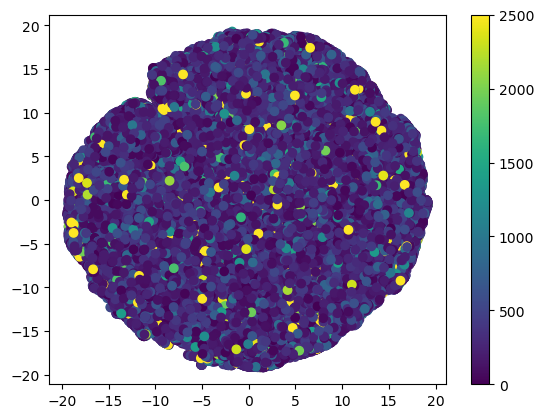

In [37]:
plt.scatter(merged["x"], merged["y"], c=merged["calories1"], cmap='viridis')
plt.colorbar()

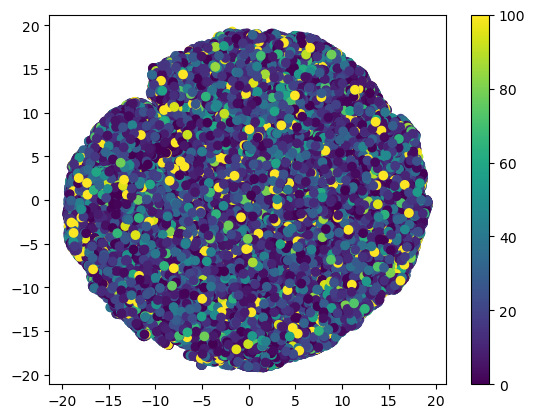

In [39]:
plt.scatter(merged["x"], merged["y"], c=merged["fat_dv1"], cmap='viridis')
plt.colorbar()

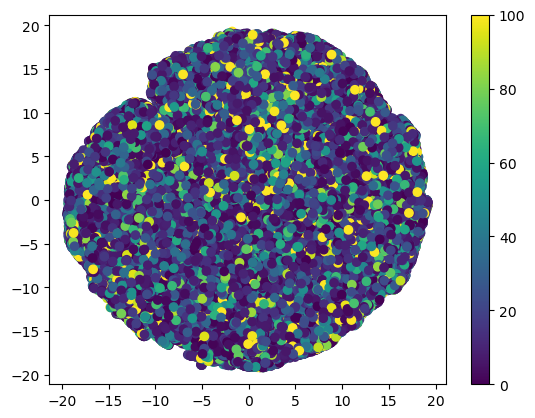

In [40]:
plt.scatter(merged["x"], merged["y"], c=merged["protein_dv1"], cmap='viridis')
plt.colorbar()

### Plot after Filtering

In [41]:
interaction_cnts_recipes = raw_subset["recipe_id"].value_counts()

In [55]:
mask_atleastn_users = interaction_cnts_recipes>=25
mask_atleastn_users.sum()

3979

In [56]:
x1 = pd.DataFrame(mask_atleastn_users)

In [57]:
mask1 = merged["item_id"].isin(x1.loc[x1["recipe_id"]==True].index)

merged_subset = merged[mask1]

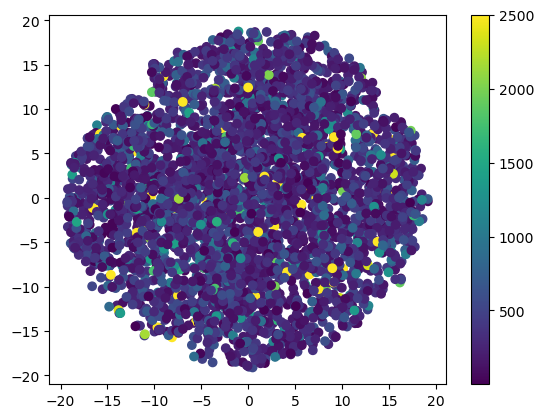

In [58]:
plt.scatter(merged_subset["x"], merged_subset["y"], c=merged_subset["calories1"], cmap='viridis')
plt.colorbar()

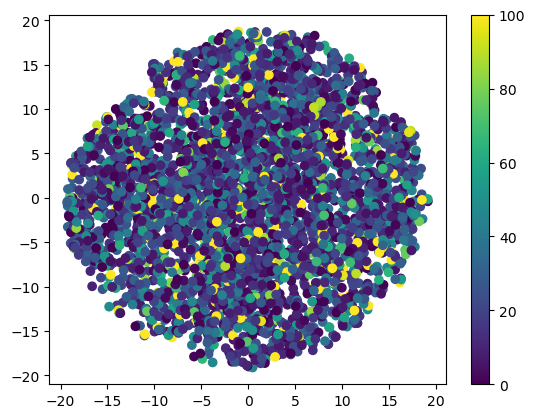

In [59]:
plt.scatter(merged_subset["x"], merged_subset["y"], c=merged_subset["fat_dv1"], cmap='viridis')
plt.colorbar()

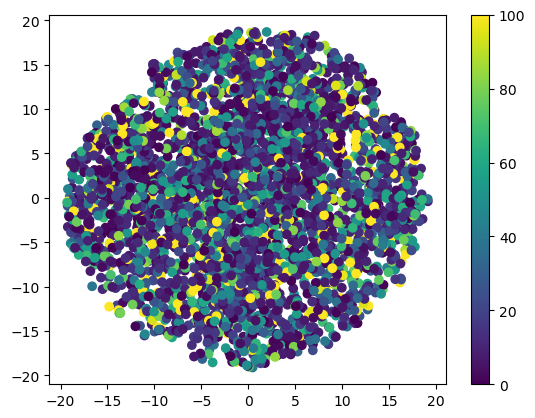

In [60]:
plt.scatter(merged_subset["x"], merged_subset["y"], c=merged_subset["protein_dv1"], cmap='viridis')
plt.colorbar()